# 딥러닝 개요_복습 프로젝트_6조

# * 참고. 문제가 여기저기 있어서 찾기 힘드시면 'ctrl+f'로 '문제'라고 검색해서 작성해주세요! *

# 0. 개념 문제

# 0.1. 다층 퍼셉트론으로 XOR 문제 해결하기

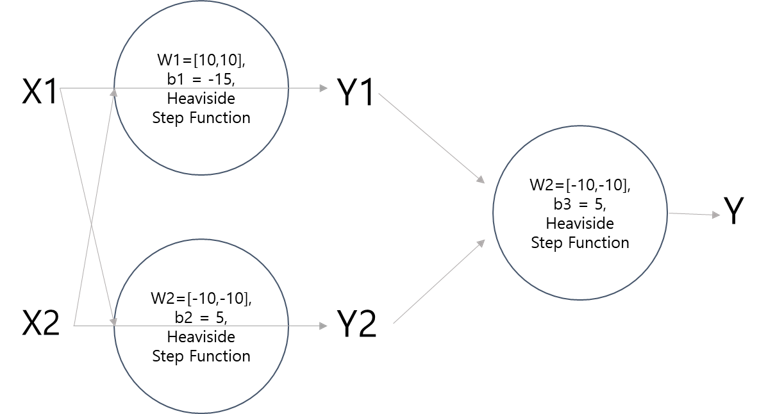

In [1]:
from IPython.display import Image
Image('MLPforXOR.png')

Q. 이때, X1=1, X2=1일 경우 XOR을 만족하는 것을 간단한 풀이과정으로 보여주세요

A. Y1 = step(10*1+10*1-15) = step(5) = 1,     Y2 = step(-10*1-10*1+5) = step(-15) = 0,
   
   따라서 Y = step(-10*1-10*0+5) = step(-5) = 0  

# 0.2. MLP와 행렬 차원 및 파라미터 수

통과 뉴런 5개로 구성된 입력층, 뉴럽 10개로 구성된 은닉층, 뉴럽 2개로 구성된 출력 층으로 이루어진 다층 퍼셉트론이 있다고 가정합시다. 이때, 모든 뉴런은 ReLU 활성화 함수를 사용합니다.<br>

1. 입력행렬 X에서 행의 크기는 무엇을 의미하나요? <br>
3. 가중치와 편향값은 총 몇 개가 있나요? <br>

답: <br>
1. batchsize를 의미한다. <br>
2. 가중치: 5*10+10*2=70 70개 / 편향값: 10+2 = 12개 <br>

# 1. 분류를 위한 MLP모델 <br>
 - [목표] MLP 모델을 학습 과정에서 모델을 수정하는 것 학습해 볼까요?

make_circles 함수를 통해서 데이터를 생성하고 MLP를 통해서 분류 문제를 해결하려고 합니다! 빈칸을 채워주세요!

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

우선, 이진분류를 위해서 2차원을 가진 1000개의 데이터를 만들었습니다.

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(1000, 
                    noise=0.03, 
                    random_state=42)

In [4]:
# 레이블이 제대로 형성되었는지 확인하겠습니다
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
# 데이터가 제대로 형성되었는 확인해보겠습니다
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# 대칭적인 레이블이 형성된 것을 확인할 수 있습니다.
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

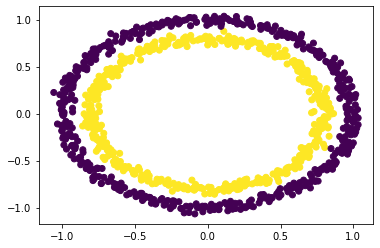

In [7]:
# 형성한 데이터를 산점도로 확인해볼까요
plt.scatter(X[:, 0], X[:, 1], c=y);

In [8]:
# 학습 데이터와 테스트 데이터 분리하겠습니다
X_train, y_train = X[:800], y[:800] 
X_test, y_test = X[800:], y[800:] 

# 개수 확인
X_train.shape, X_test.shape

((800, 2), (200, 2))

아래 함수는 추후 시각화에 필요한 함수이기 때문에 실행해주세요!

In [9]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    # 경계선
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## 저희 목적은 다층신경망 모델(MLP)로 제대로 이진 분류를 하는 것입니다! 아래 빈칸을 채워주세요

## 문제 1.1.

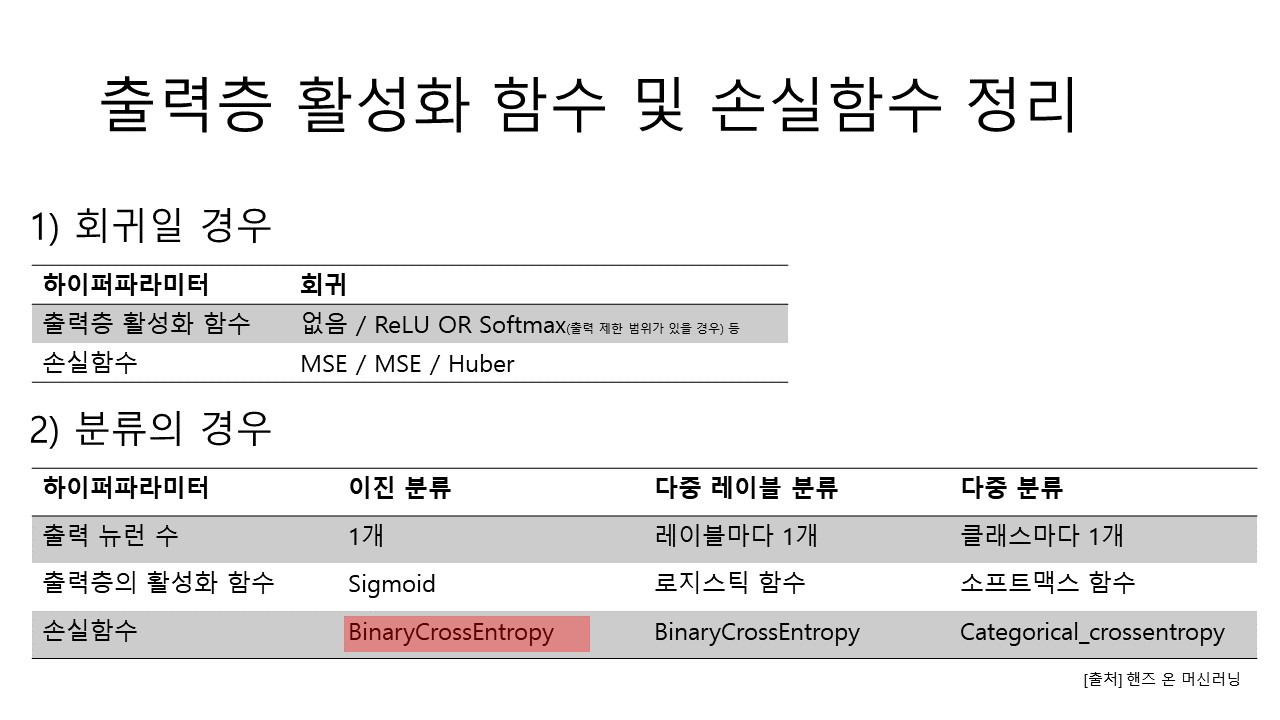

In [10]:
# 아래 loss 매개변수를 채우실 때 참고해주세요
from IPython.display import Image
Image('evalution1.png')

In [11]:
tf.random.set_seed(42)

# 일단 먼저 모델을 만들어볼까요
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4), 
  tf.keras.layers.Dense(4), 
  tf.keras.layers.Dense(1) 
])


# 손실함수와 옵티마이저를 설정해보겠습니다
model_1.compile(loss='binary_crossentropy', #문제 이진 분류인데 어떤 손실함수가 들어가는 것이 좋을까요?#
                optimizer='sgd',#문제 우선, 옵티마이저 함수로 SGD를 넣어볼까요?#
                metrics=['accuracy'])

# 학습 시켜보겠습니다
model_1.fit(X_train, y_train, epochs=1) #문제, epochs=1로 학습시켜주세요#

Train on 800 samples
800/800 [==============================] - 1s 792us/sample - loss: 1.9924 - accuracy: 0.5375


doing binary classifcation...


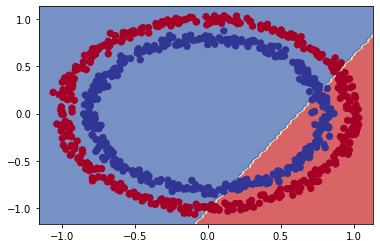

In [12]:
# 시각화
plot_decision_boundary(model_1, X_train, y_train)

## 문제 1.2. 흠... 원으로 분류를 해야하는데 직선으로 분류가 되어있네요... 뭐가 문제인 것 같은신가요?
## 힌트. 각 노드에서 어떤 부분이 빠져있는지 확인해주세요.

## 답: 비선형성 분류를 나타내기 위한 활성화 함수가 적용되지 않아 선형 결합 분류만 가능했다. 

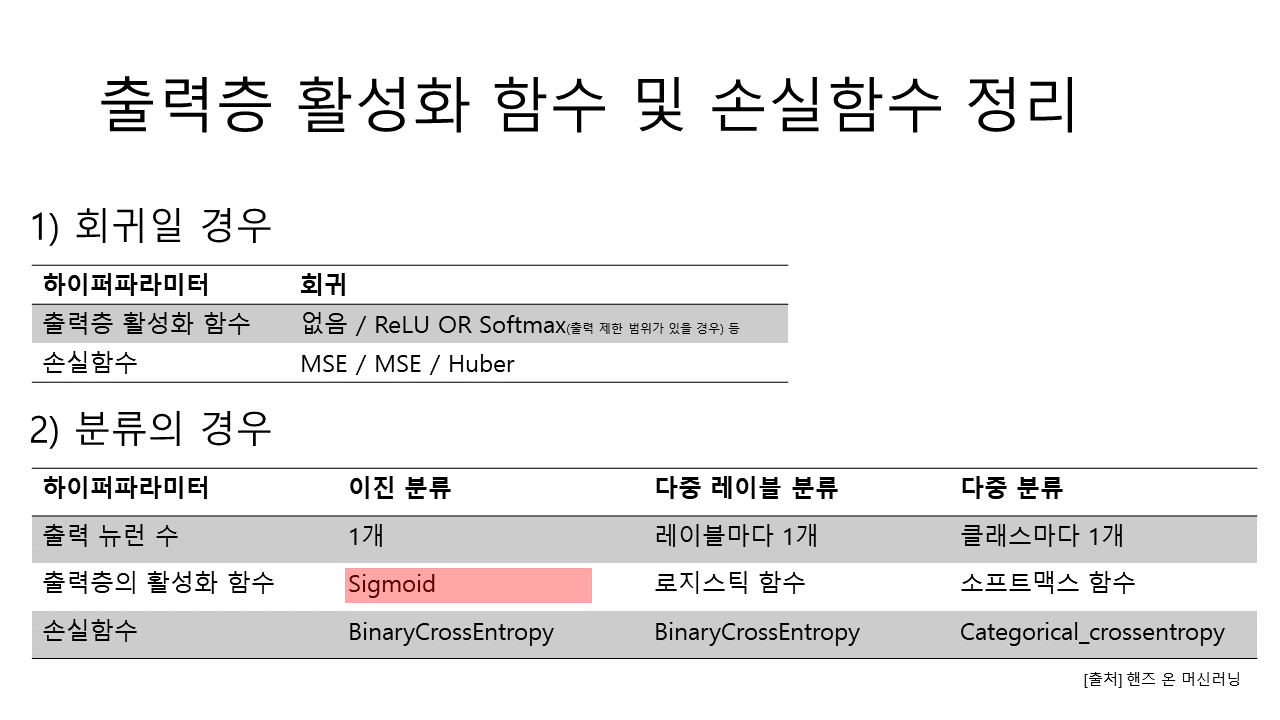

In [13]:
# 아래 출력층 활성화 함수를 채울 때 참고해주세요!
from IPython.display import Image
Image('evalution2.png')

 ## 문제. 그렇다면 아래에 relu함수를 넣어주세요!

In [14]:
tf.random.set_seed(42)

# 모델 설정
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'), #문제. 위 조건에 따라서 비활성화 함수를 넣어주세요#
  tf.keras.layers.Dense(4, activation='relu'), #문제. 위 조건에 따라서 비활성화 함수를 넣어주세요#
  tf.keras.layers.Dense(1, activation='sigmoid') # 문제 마지막 출력층에는 어떤 함수가 들어가는 것이 좋을까요#
])

model_2.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# 모델 학습
model_2.fit(X_train, y_train, epochs=1)

Train on 800 samples
800/800 [==============================] - 1s 657us/sample - loss: 0.6927 - accuracy: 0.4975


doing binary classifcation...


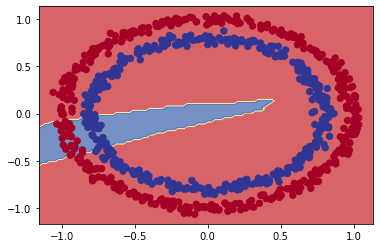

In [15]:
# 시각화
plot_decision_boundary(model_2, X_train, y_train)

## 문제 1.3. accuracy가 50%로 매우 낮은 정확도를 보입니다? epoch를 늘려볼까요? epochs를 1에서 200으로 늘려주세요!

In [16]:
#문제 epochs를 200개로 늘려주세요!#
tf.random.set_seed(42)

# 모델 설정
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'), 
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# 모델 학습
model_3.fit(X_train, y_train, epochs=200) #문제 빈칸을 채워주세요#

Train on 800 samples
Epoch 1/200
800/800 [==============================] - 1s 661us/sample - loss: 0.6927 - accuracy: 0.4975
Epoch 2/200
800/800 [==============================] - 0s 77us/sample - loss: 0.6890 - accuracy: 0.4988
Epoch 3/200
800/800 [==============================] - 0s 71us/sample - loss: 0.6865 - accuracy: 0.5100
Epoch 4/200
800/800 [==============================] - 0s 77us/sample - loss: 0.6847 - accuracy: 0.5213
Epoch 5/200
800/800 [==============================] - 0s 82us/sample - loss: 0.6836 - accuracy: 0.5200
Epoch 6/200
800/800 [==============================] - 0s 79us/sample - loss: 0.6827 - accuracy: 0.5175
Epoch 7/200
800/800 [==============================] - 0s 75us/sample - loss: 0.6820 - accuracy: 0.5275
Epoch 8/200
800/800 [==============================] - 0s 87us/sample - loss: 0.6814 - accuracy: 0.5312
Epoch 9/200
800/800 [==============================] - 0s 92us/sample - loss: 0.6810 - accuracy: 0.5337
Epoch 10/200
800/800 [====================

800/800 [==============================] - 0s 86us/sample - loss: 0.6710 - accuracy: 0.5575
Epoch 79/200
800/800 [==============================] - 0s 85us/sample - loss: 0.6710 - accuracy: 0.5587
Epoch 80/200
800/800 [==============================] - 0s 128us/sample - loss: 0.6708 - accuracy: 0.5562
Epoch 81/200
800/800 [==============================] - 0s 138us/sample - loss: 0.6706 - accuracy: 0.5562
Epoch 82/200
800/800 [==============================] - 0s 136us/sample - loss: 0.6705 - accuracy: 0.5587
Epoch 83/200
800/800 [==============================] - 0s 110us/sample - loss: 0.6704 - accuracy: 0.5600
Epoch 84/200
800/800 [==============================] - 0s 156us/sample - loss: 0.6702 - accuracy: 0.5575
Epoch 85/200
800/800 [==============================] - 0s 148us/sample - loss: 0.6701 - accuracy: 0.5575
Epoch 86/200
800/800 [==============================] - 0s 123us/sample - loss: 0.6700 - accuracy: 0.5612
Epoch 87/200
800/800 [==============================] - 0s 71

800/800 [==============================] - 0s 127us/sample - loss: 0.6594 - accuracy: 0.5763
Epoch 156/200
800/800 [==============================] - 0s 140us/sample - loss: 0.6592 - accuracy: 0.5750
Epoch 157/200
800/800 [==============================] - 0s 166us/sample - loss: 0.6590 - accuracy: 0.5750
Epoch 158/200
800/800 [==============================] - 0s 160us/sample - loss: 0.6588 - accuracy: 0.5788
Epoch 159/200
800/800 [==============================] - 0s 163us/sample - loss: 0.6587 - accuracy: 0.5763
Epoch 160/200
800/800 [==============================] - 0s 161us/sample - loss: 0.6584 - accuracy: 0.5775
Epoch 161/200
800/800 [==============================] - 0s 156us/sample - loss: 0.6582 - accuracy: 0.5775
Epoch 162/200
800/800 [==============================] - 0s 138us/sample - loss: 0.6581 - accuracy: 0.5775
Epoch 163/200
800/800 [==============================] - 0s 151us/sample - loss: 0.6579 - accuracy: 0.5825
Epoch 164/200
800/800 [============================

doing binary classifcation...


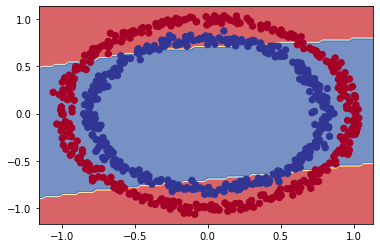

In [17]:
# 시각화
plot_decision_boundary(model_3, X_train, y_train)

## 문제 1.4. 여전히 좋지 않네요... 도대체 뭐가 문제일까요? optimizer를 바꿔볼까요?
## optimizer을 SGD에서 Adam으로 바꿔주세요

In [18]:
#문제 옵티마이저 함수를 Adam으로 바꿔주세요!#
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer='adam', #문제#
                metrics=['accuracy'])

history = model_4.fit(X_train, y_train, epochs=200)

Train on 800 samples
Epoch 1/200
800/800 [==============================] - 1s 818us/sample - loss: 0.6929 - accuracy: 0.5000
Epoch 2/200
800/800 [==============================] - 0s 84us/sample - loss: 0.6879 - accuracy: 0.5013
Epoch 3/200
800/800 [==============================] - 0s 82us/sample - loss: 0.6851 - accuracy: 0.5138
Epoch 4/200
800/800 [==============================] - 0s 86us/sample - loss: 0.6834 - accuracy: 0.5200
Epoch 5/200
800/800 [==============================] - 0s 98us/sample - loss: 0.6824 - accuracy: 0.5275
Epoch 6/200
800/800 [==============================] - 0s 95us/sample - loss: 0.6818 - accuracy: 0.5312
Epoch 7/200
800/800 [==============================] - 0s 89us/sample - loss: 0.6814 - accuracy: 0.5362
Epoch 8/200
800/800 [==============================] - 0s 133us/sample - loss: 0.6807 - accuracy: 0.5362
Epoch 9/200
800/800 [==============================] - 0s 133us/sample - loss: 0.6804 - accuracy: 0.5387
Epoch 10/200
800/800 [==================

800/800 [==============================] - 0s 95us/sample - loss: 0.6158 - accuracy: 0.7337
Epoch 79/200
800/800 [==============================] - 0s 87us/sample - loss: 0.6136 - accuracy: 0.7412
Epoch 80/200
800/800 [==============================] - 0s 130us/sample - loss: 0.6107 - accuracy: 0.7475
Epoch 81/200
800/800 [==============================] - 0s 131us/sample - loss: 0.6082 - accuracy: 0.7500
Epoch 82/200
800/800 [==============================] - 0s 110us/sample - loss: 0.6055 - accuracy: 0.7588
Epoch 83/200
800/800 [==============================] - 0s 122us/sample - loss: 0.6033 - accuracy: 0.7775
Epoch 84/200
800/800 [==============================] - 0s 86us/sample - loss: 0.6000 - accuracy: 0.7738
Epoch 85/200
800/800 [==============================] - 0s 99us/sample - loss: 0.5974 - accuracy: 0.7850
Epoch 86/200
800/800 [==============================] - 0s 95us/sample - loss: 0.5949 - accuracy: 0.7713
Epoch 87/200
800/800 [==============================] - 0s 87us/

800/800 [==============================] - 0s 157us/sample - loss: 0.2601 - accuracy: 0.9850
Epoch 155/200
800/800 [==============================] - 0s 181us/sample - loss: 0.2559 - accuracy: 0.9837
Epoch 156/200
800/800 [==============================] - 0s 158us/sample - loss: 0.2521 - accuracy: 0.9887
Epoch 157/200
800/800 [==============================] - 0s 168us/sample - loss: 0.2493 - accuracy: 0.9812
Epoch 158/200
800/800 [==============================] - 0s 162us/sample - loss: 0.2445 - accuracy: 0.9862
Epoch 159/200
800/800 [==============================] - 0s 167us/sample - loss: 0.2415 - accuracy: 0.9850
Epoch 160/200
800/800 [==============================] - 0s 163us/sample - loss: 0.2375 - accuracy: 0.9850
Epoch 161/200
800/800 [==============================] - 0s 161us/sample - loss: 0.2334 - accuracy: 0.9887
Epoch 162/200
800/800 [==============================] - 0s 167us/sample - loss: 0.2291 - accuracy: 0.9862
Epoch 163/200
800/800 [============================

doing binary classifcation...


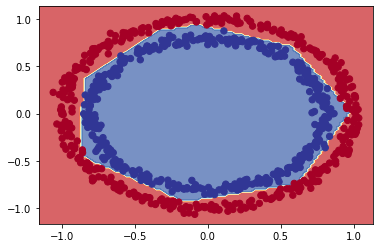

In [19]:
plot_decision_boundary(model_4, X_train, y_train)

In [20]:
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

200/200 [==============================] - 0s 909us/sample - loss: 0.1215 - accuracy: 0.9950
Model loss on the test set: 0.1214717361330986
Model accuracy on the test set: 99.50%


doing binary classifcation...
doing binary classifcation...


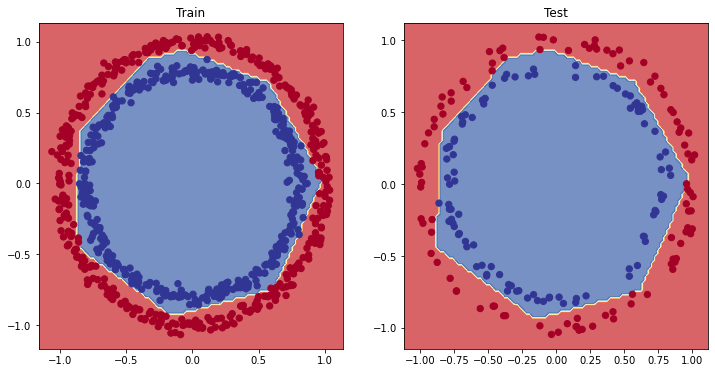

In [21]:
# 학습데이터와 테스트 데이터가 잘 분류되었는지 산점도로 확인해볼까요?

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [22]:
# epoch마다 확인할 수 있습니다
pd.DataFrame(history.history)

,loss,accuracy
0,0.692939,0.50000
1,0.687925,0.50125
2,0.685117,0.51375
3,0.683365,0.52000
4,0.682443,0.52750
...,...,...
195,0.141555,0.99125
196,0.140275,0.99125
197,0.137976,0.99125
198,0.135632,0.99250


Text(0.5, 1.0, 'Model_4 training curves')

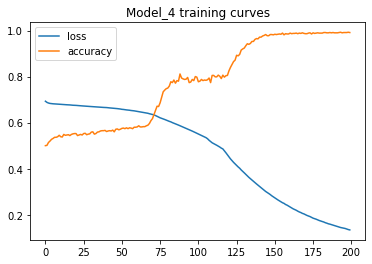

In [23]:
# 정확도 및 Loss curve를 표현해볼까요 실행시켜주세요
pd.DataFrame(history.history).plot()
plt.title("Model_4 training curves")

# 2. 회귀를 위한 MLP

 - 이번에는 회귀를 MLP를 통해서 풀어볼까요?

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_file, plot_model
import warnings
warnings.filterwarnings('ignore')
# plot_model: 시각화, get_file로 외부 데이터

In [25]:
# 데이터를 외부에서 불러오겠습니다!
dataset_path = get_file('auto-mpg.data','http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

In [26]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration',
               'Model Year','Origin']

In [27]:
raw_dataset = pd.read_csv(dataset_path,names=column_names,
                          na_values = '?',comment='\t',
                          sep=' ',skipinitialspace=True)

dataset= raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [28]:
# 결측치 확인
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## 문제 2.1. 결측치를 가진 행을 모두 날려주세요

In [29]:
dataset = dataset.dropna()

In [30]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

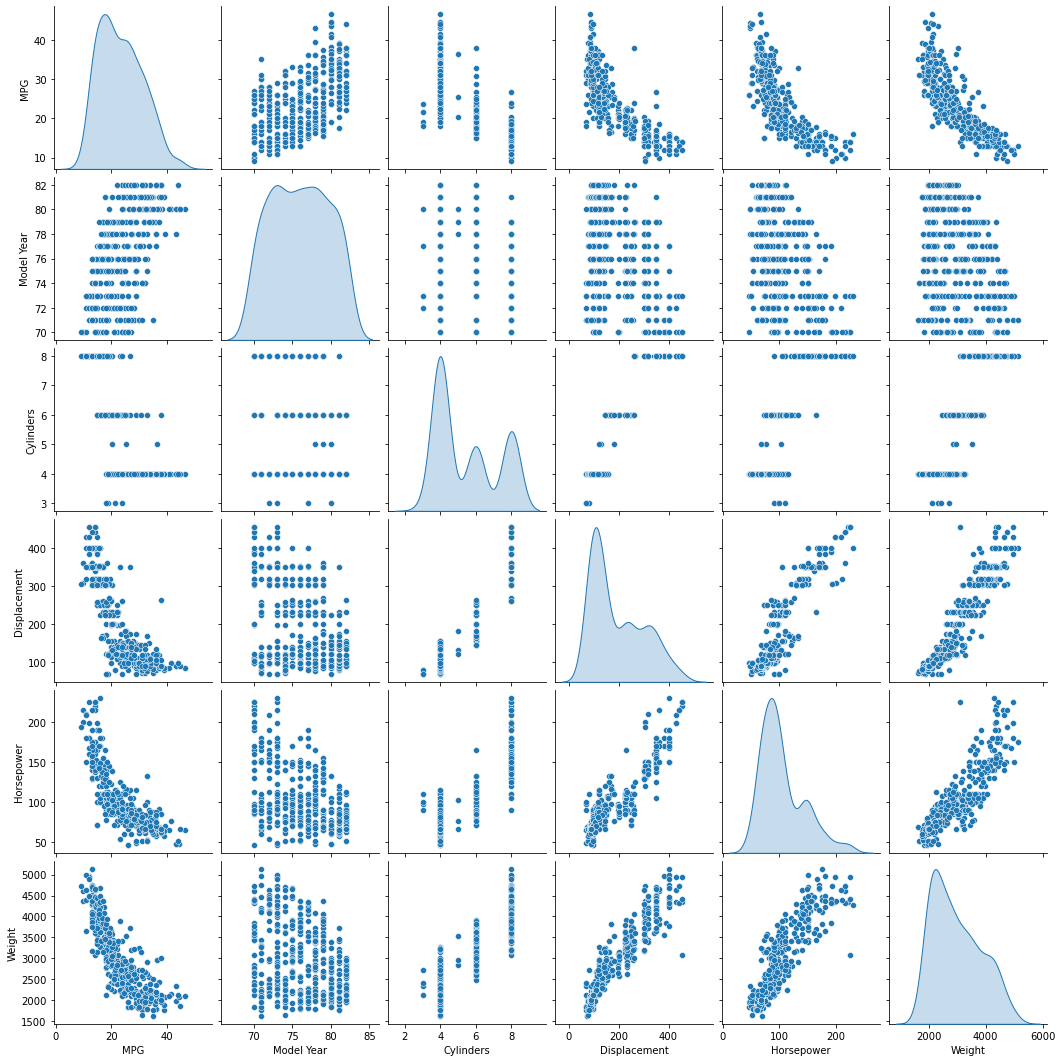

In [31]:
# EDA를 진행해보겠습니다
sns.pairplot(dataset[['MPG','Model Year','Cylinders','Displacement','Horsepower','Weight']],diag_kind='kde')

In [32]:
#Origin이라는 속성만 원핫인코딩을 진행하겠습니다.
dataset['Origin'].unique()

array([1, 3, 2], dtype=int64)

In [33]:
origin = dataset.pop('Origin')

In [34]:
dataset['Origin1'] = (origin == 1) * 1.0
dataset['Origin2'] = (origin == 2) * 1.0
dataset['Origin3'] = (origin == 3) * 1.0

In [35]:
# 원핫인코딩이 잘 된 것을 확인할 수 있습니다.
dataset.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin1,Origin2,Origin3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [36]:
train_dataset = dataset.sample(frac=0.8, random_state=10)
test_dataset = dataset.drop(train_dataset.index)

## 저희는 MPG가 타겟 데이터이기 때문에 따로 y에 저장을 하겠습니다!
## 참고. MPG = Miles Per Gallon

In [37]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [38]:
train_stats = train_dataset.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.417197,1.688475,3.0,4.000,4.0,6.000,8.0
Displacement,314.0,191.463376,102.948230,68.0,101.750,144.5,259.500,454.0
Horsepower,314.0,103.191083,37.622496,46.0,75.000,90.0,120.000,230.0
Weight,314.0,2967.388535,845.042110,1613.0,2220.750,2767.0,3554.750,5140.0
Acceleration,314.0,15.692675,2.774814,8.5,13.925,15.5,17.275,24.8
Model Year,314.0,75.958599,3.627399,70.0,73.000,76.0,79.000,82.0
Origin1,314.0,0.621019,0.485908,0.0,0.000,1.0,1.000,1.0
Origin2,314.0,0.187898,0.391254,0.0,0.000,0.0,0.000,1.0
Origin3,314.0,0.191083,0.393782,0.0,0.000,0.0,0.000,1.0


In [39]:
# 데이터 정규화를 진행해주겠습니다
def normalization(x):
    return(x-train_stats['mean'])/train_stats['std']

normed_train_data = normalization(train_dataset)
normed_test_data = normalization(test_dataset)

In [40]:
# input_size를 정하기 위해서 피쳐개수를 확인해보겠습니다
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Origin1', 'Origin2', 'Origin3'],
      dtype='object')

## 문제 2.2. 회귀를 위한 MLP모델에서 다음을 채워주세요

In [41]:
# 모델 구성
tf.random.set_seed(100)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',name='dense1',input_shape=[9]),
    tf.keras.layers.Dense(64, activation='relu',name='dense2'), 
    tf.keras.layers.Dense(1, name='output')
])

model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.001), #문제 옵티마이저함수를 RMSprop으로 채워주세요. 학습률은 0.001로!#
                 metrics=[['mae', 'mse']]) # 두 평가지표로 진행해보겠습니다. mae 와 mse를 리스트 형태로 넣어주세요#

## 문제 2.3. 출력층에 반드시 활성화 함수가 필요할까요?

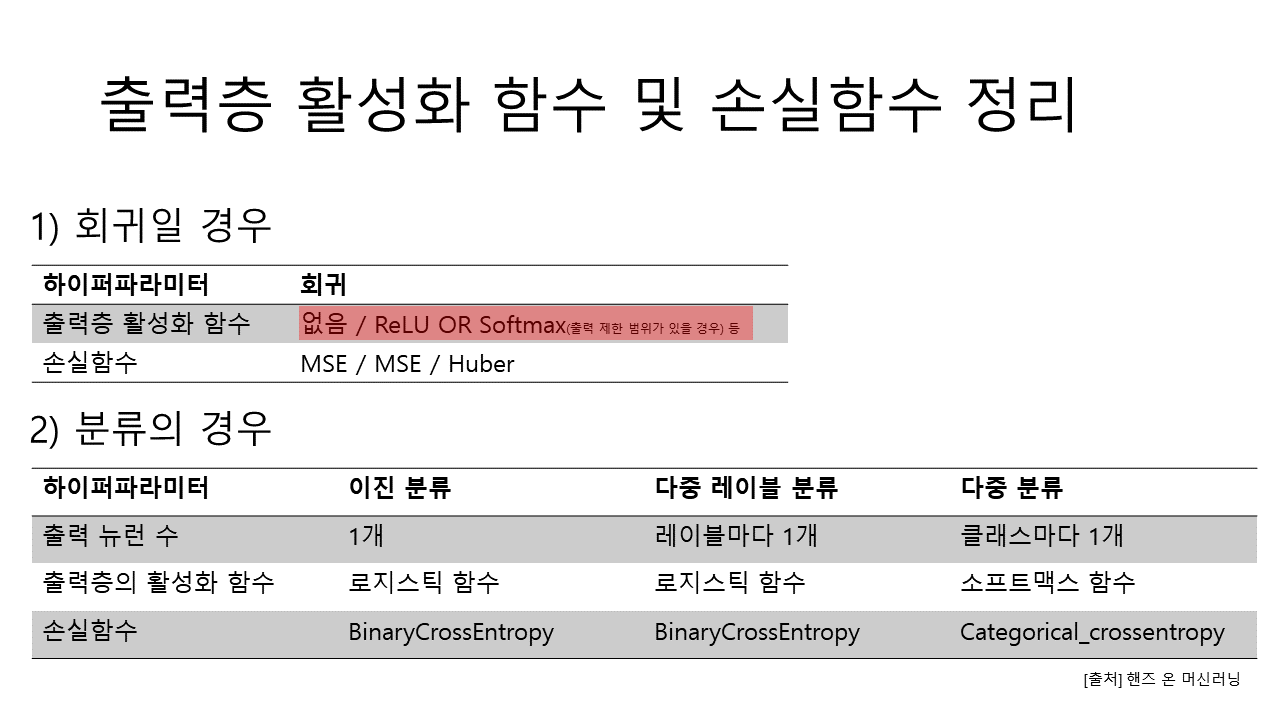

In [42]:
# 힌트
from IPython.display import Image
Image('evalution3.png')

## 답: 반드시 필요한 것은 아니다. 비선형성을 위해 활성화 함수를 사용하는 것으로, 회귀일 경우 활성화 함수가 필요 없다. 

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 64)                640       
_________________________________________________________________
dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


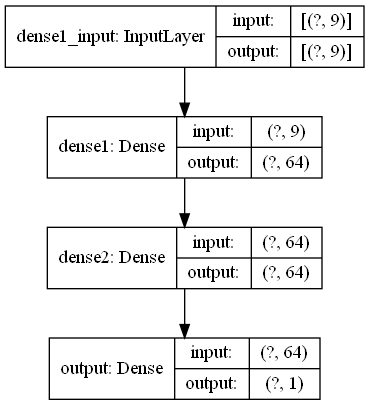

In [44]:
# 다음과 같은 구조로 모델을 만든 것을 확인할 수 있어요!
plot_model(model,show_shapes=True)

In [45]:
epochs = 1000
history = model.fit(normed_train_data, train_labels,
                   epochs = epochs, validation_split=0.2)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 1s 4ms/sample - loss: 594.6820 - mae: 23.2578 - mse: 594.6819 - val_loss: 669.4513 - val_mae: 24.4694 - val_mse: 669.4513
Epoch 2/1000
251/251 [==============================] - 0s 171us/sample - loss: 559.9116 - mae: 22.5320 - mse: 559.9116 - val_loss: 635.1391 - val_mae: 23.7986 - val_mse: 635.1392
Epoch 3/1000
251/251 [==============================] - 0s 174us/sample - loss: 529.0565 - mae: 21.8731 - mse: 529.0565 - val_loss: 599.3829 - val_mae: 23.0912 - val_mse: 599.3829
Epoch 4/1000
251/251 [==============================] - 0s 167us/sample - loss: 495.0531 - mae: 21.1425 - mse: 495.0532 - val_loss: 556.9756 - val_mae: 22.2401 - val_mse: 556.9756
Epoch 5/1000
251/251 [==============================] - 0s 171us/sample - loss: 455.5601 - mae: 20.2664 - mse: 455.5601 - val_loss: 509.2620 - val_mae: 21.2473 - val_mse: 509.2620
Epoch 6/1000
251/251 [==============================] - 0

251/251 [==============================] - 0s 338us/sample - loss: 6.7711 - mae: 1.9342 - mse: 6.7711 - val_loss: 12.7480 - val_mae: 2.4912 - val_mse: 12.7480
Epoch 48/1000
251/251 [==============================] - 0s 306us/sample - loss: 6.7426 - mae: 1.9291 - mse: 6.7426 - val_loss: 12.7024 - val_mae: 2.4881 - val_mse: 12.7024
Epoch 49/1000
251/251 [==============================] - 0s 278us/sample - loss: 6.5238 - mae: 1.8776 - mse: 6.5238 - val_loss: 11.2620 - val_mae: 2.3615 - val_mse: 11.2620
Epoch 50/1000
251/251 [==============================] - 0s 261us/sample - loss: 6.7734 - mae: 1.9491 - mse: 6.7734 - val_loss: 12.7866 - val_mae: 2.4875 - val_mse: 12.7866
Epoch 51/1000
251/251 [==============================] - 0s 275us/sample - loss: 6.6481 - mae: 1.9078 - mse: 6.6481 - val_loss: 11.0885 - val_mae: 2.3316 - val_mse: 11.0885
Epoch 52/1000
251/251 [==============================] - 0s 299us/sample - loss: 6.5016 - mae: 1.8992 - mse: 6.5015 - val_loss: 11.8761 - val_mae: 2.

251/251 [==============================] - 0s 215us/sample - loss: 5.1872 - mae: 1.7194 - mse: 5.1872 - val_loss: 12.3443 - val_mae: 2.3933 - val_mse: 12.3443
Epoch 95/1000
251/251 [==============================] - 0s 159us/sample - loss: 5.1609 - mae: 1.7049 - mse: 5.1609 - val_loss: 12.1520 - val_mae: 2.3921 - val_mse: 12.1520
Epoch 96/1000
251/251 [==============================] - 0s 206us/sample - loss: 5.2191 - mae: 1.6860 - mse: 5.2191 - val_loss: 11.2904 - val_mae: 2.2939 - val_mse: 11.2904
Epoch 97/1000
251/251 [==============================] - 0s 278us/sample - loss: 5.0732 - mae: 1.7056 - mse: 5.0732 - val_loss: 12.7896 - val_mae: 2.4250 - val_mse: 12.7896
Epoch 98/1000
251/251 [==============================] - 0s 278us/sample - loss: 5.0895 - mae: 1.6839 - mse: 5.0895 - val_loss: 14.2449 - val_mae: 2.6074 - val_mse: 14.2449
Epoch 99/1000
251/251 [==============================] - 0s 251us/sample - loss: 5.1706 - mae: 1.7227 - mse: 5.1706 - val_loss: 12.6050 - val_mae: 2.

251/251 [==============================] - 0s 219us/sample - loss: 4.4260 - mae: 1.5938 - mse: 4.4260 - val_loss: 12.2237 - val_mae: 2.3736 - val_mse: 12.2237
Epoch 142/1000
251/251 [==============================] - 0s 234us/sample - loss: 4.4907 - mae: 1.6037 - mse: 4.4907 - val_loss: 12.0459 - val_mae: 2.3456 - val_mse: 12.0459
Epoch 143/1000
251/251 [==============================] - 0s 215us/sample - loss: 4.4603 - mae: 1.6329 - mse: 4.4603 - val_loss: 11.8429 - val_mae: 2.3514 - val_mse: 11.8429
Epoch 144/1000
251/251 [==============================] - 0s 163us/sample - loss: 4.3989 - mae: 1.5896 - mse: 4.3989 - val_loss: 11.5752 - val_mae: 2.3178 - val_mse: 11.5752
Epoch 145/1000
251/251 [==============================] - 0s 115us/sample - loss: 4.4365 - mae: 1.5956 - mse: 4.4365 - val_loss: 12.0852 - val_mae: 2.3593 - val_mse: 12.0852
Epoch 146/1000
251/251 [==============================] - 0s 167us/sample - loss: 4.2735 - mae: 1.5631 - mse: 4.2735 - val_loss: 12.5710 - val_ma

251/251 [==============================] - 0s 179us/sample - loss: 3.9714 - mae: 1.5142 - mse: 3.9714 - val_loss: 12.9886 - val_mae: 2.4418 - val_mse: 12.9886
Epoch 189/1000
251/251 [==============================] - 0s 270us/sample - loss: 3.9244 - mae: 1.4882 - mse: 3.9244 - val_loss: 12.7241 - val_mae: 2.4257 - val_mse: 12.7241
Epoch 190/1000
251/251 [==============================] - 0s 318us/sample - loss: 3.9743 - mae: 1.5105 - mse: 3.9743 - val_loss: 12.2632 - val_mae: 2.3862 - val_mse: 12.2632
Epoch 191/1000
251/251 [==============================] - 0s 290us/sample - loss: 3.8698 - mae: 1.5014 - mse: 3.8698 - val_loss: 12.1354 - val_mae: 2.3826 - val_mse: 12.1354
Epoch 192/1000
251/251 [==============================] - 0s 163us/sample - loss: 3.9399 - mae: 1.4949 - mse: 3.9399 - val_loss: 12.4824 - val_mae: 2.4138 - val_mse: 12.4824
Epoch 193/1000
251/251 [==============================] - 0s 234us/sample - loss: 3.8243 - mae: 1.4866 - mse: 3.8243 - val_loss: 12.9225 - val_ma

251/251 [==============================] - 0s 171us/sample - loss: 3.5691 - mae: 1.4297 - mse: 3.5691 - val_loss: 12.1445 - val_mae: 2.3794 - val_mse: 12.1445
Epoch 236/1000
251/251 [==============================] - 0s 183us/sample - loss: 3.5071 - mae: 1.4371 - mse: 3.5071 - val_loss: 12.0594 - val_mae: 2.3752 - val_mse: 12.0594
Epoch 237/1000
251/251 [==============================] - 0s 171us/sample - loss: 3.5479 - mae: 1.4246 - mse: 3.5479 - val_loss: 12.2733 - val_mae: 2.3969 - val_mse: 12.2733
Epoch 238/1000
251/251 [==============================] - 0s 167us/sample - loss: 3.4354 - mae: 1.4038 - mse: 3.4354 - val_loss: 12.0956 - val_mae: 2.3742 - val_mse: 12.0956
Epoch 239/1000
251/251 [==============================] - 0s 167us/sample - loss: 3.5934 - mae: 1.4595 - mse: 3.5934 - val_loss: 13.6018 - val_mae: 2.4904 - val_mse: 13.6018
Epoch 240/1000
251/251 [==============================] - 0s 174us/sample - loss: 3.4480 - mae: 1.4134 - mse: 3.4480 - val_loss: 12.1614 - val_ma

Epoch 282/1000
251/251 [==============================] - 0s 175us/sample - loss: 3.1210 - mae: 1.3387 - mse: 3.1210 - val_loss: 13.5834 - val_mae: 2.4934 - val_mse: 13.5834
Epoch 283/1000
251/251 [==============================] - 0s 171us/sample - loss: 3.2315 - mae: 1.3658 - mse: 3.2315 - val_loss: 12.7111 - val_mae: 2.4134 - val_mse: 12.7111
Epoch 284/1000
251/251 [==============================] - 0s 159us/sample - loss: 3.1328 - mae: 1.3359 - mse: 3.1328 - val_loss: 13.3877 - val_mae: 2.4627 - val_mse: 13.3877
Epoch 285/1000
251/251 [==============================] - 0s 169us/sample - loss: 3.0733 - mae: 1.3798 - mse: 3.0733 - val_loss: 13.8081 - val_mae: 2.4957 - val_mse: 13.8081
Epoch 286/1000
251/251 [==============================] - 0s 171us/sample - loss: 3.0681 - mae: 1.3550 - mse: 3.0681 - val_loss: 13.1082 - val_mae: 2.5076 - val_mse: 13.1082
Epoch 287/1000
251/251 [==============================] - 0s 159us/sample - loss: 3.1452 - mae: 1.3549 - mse: 3.1452 - val_loss: 1

251/251 [==============================] - 0s 195us/sample - loss: 2.8162 - mae: 1.2995 - mse: 2.8162 - val_loss: 13.6136 - val_mae: 2.4696 - val_mse: 13.6136
Epoch 330/1000
251/251 [==============================] - 0s 153us/sample - loss: 2.8331 - mae: 1.2856 - mse: 2.8331 - val_loss: 13.2725 - val_mae: 2.4280 - val_mse: 13.2725
Epoch 331/1000
251/251 [==============================] - 0s 185us/sample - loss: 2.7890 - mae: 1.2591 - mse: 2.7890 - val_loss: 12.8370 - val_mae: 2.3930 - val_mse: 12.8370
Epoch 332/1000
251/251 [==============================] - 0s 235us/sample - loss: 2.8257 - mae: 1.2706 - mse: 2.8257 - val_loss: 13.2092 - val_mae: 2.4534 - val_mse: 13.2092
Epoch 333/1000
251/251 [==============================] - 0s 235us/sample - loss: 2.7323 - mae: 1.2486 - mse: 2.7323 - val_loss: 12.7361 - val_mae: 2.4081 - val_mse: 12.7361
Epoch 334/1000
251/251 [==============================] - 0s 219us/sample - loss: 2.9234 - mae: 1.3006 - mse: 2.9234 - val_loss: 13.4414 - val_ma

Epoch 376/1000
251/251 [==============================] - 0s 187us/sample - loss: 2.5003 - mae: 1.1958 - mse: 2.5003 - val_loss: 13.7330 - val_mae: 2.4767 - val_mse: 13.7330
Epoch 377/1000
251/251 [==============================] - 0s 195us/sample - loss: 2.5168 - mae: 1.2014 - mse: 2.5168 - val_loss: 14.0009 - val_mae: 2.5052 - val_mse: 14.0009
Epoch 378/1000
251/251 [==============================] - 0s 159us/sample - loss: 2.5649 - mae: 1.2104 - mse: 2.5649 - val_loss: 15.1542 - val_mae: 2.6022 - val_mse: 15.1542
Epoch 379/1000
251/251 [==============================] - 0s 178us/sample - loss: 2.6302 - mae: 1.2185 - mse: 2.6302 - val_loss: 13.4756 - val_mae: 2.4777 - val_mse: 13.4756
Epoch 380/1000
251/251 [==============================] - 0s 257us/sample - loss: 2.7553 - mae: 1.2662 - mse: 2.7553 - val_loss: 14.1418 - val_mae: 2.5208 - val_mse: 14.1418
Epoch 381/1000
251/251 [==============================] - 0s 274us/sample - loss: 2.5343 - mae: 1.1995 - mse: 2.5343 - val_loss: 1

251/251 [==============================] - 0s 155us/sample - loss: 2.4880 - mae: 1.1922 - mse: 2.4880 - val_loss: 14.0872 - val_mae: 2.5036 - val_mse: 14.0872
Epoch 424/1000
251/251 [==============================] - 0s 155us/sample - loss: 2.3208 - mae: 1.1526 - mse: 2.3208 - val_loss: 15.3169 - val_mae: 2.6067 - val_mse: 15.3169
Epoch 425/1000
251/251 [==============================] - 0s 155us/sample - loss: 2.3147 - mae: 1.1516 - mse: 2.3147 - val_loss: 13.5961 - val_mae: 2.4458 - val_mse: 13.5961
Epoch 426/1000
251/251 [==============================] - 0s 203us/sample - loss: 2.3640 - mae: 1.1595 - mse: 2.3640 - val_loss: 13.5632 - val_mae: 2.4542 - val_mse: 13.5632
Epoch 427/1000
251/251 [==============================] - 0s 151us/sample - loss: 2.4993 - mae: 1.2106 - mse: 2.4993 - val_loss: 14.9613 - val_mae: 2.5827 - val_mse: 14.9613
Epoch 428/1000
251/251 [==============================] - 0s 162us/sample - loss: 2.4440 - mae: 1.1925 - mse: 2.4440 - val_loss: 14.9786 - val_ma

251/251 [==============================] - 0s 187us/sample - loss: 2.3437 - mae: 1.1321 - mse: 2.3437 - val_loss: 14.0174 - val_mae: 2.4839 - val_mse: 14.0174
Epoch 471/1000
251/251 [==============================] - 0s 254us/sample - loss: 2.3203 - mae: 1.1541 - mse: 2.3203 - val_loss: 14.1767 - val_mae: 2.5076 - val_mse: 14.1767
Epoch 472/1000
251/251 [==============================] - 0s 266us/sample - loss: 2.1413 - mae: 1.1115 - mse: 2.1413 - val_loss: 15.1333 - val_mae: 2.5987 - val_mse: 15.1333
Epoch 473/1000
251/251 [==============================] - 0s 286us/sample - loss: 2.3947 - mae: 1.1608 - mse: 2.3947 - val_loss: 14.2809 - val_mae: 2.5097 - val_mse: 14.2809
Epoch 474/1000
251/251 [==============================] - 0s 266us/sample - loss: 2.1926 - mae: 1.1222 - mse: 2.1926 - val_loss: 15.6272 - val_mae: 2.6048 - val_mse: 15.6272
Epoch 475/1000
251/251 [==============================] - 0s 175us/sample - loss: 2.1572 - mae: 1.1152 - mse: 2.1572 - val_loss: 14.7700 - val_ma

251/251 [==============================] - 0s 238us/sample - loss: 2.1331 - mae: 1.0910 - mse: 2.1331 - val_loss: 15.0495 - val_mae: 2.5871 - val_mse: 15.0495
Epoch 518/1000
251/251 [==============================] - 0s 187us/sample - loss: 2.1074 - mae: 1.0877 - mse: 2.1074 - val_loss: 13.9820 - val_mae: 2.4845 - val_mse: 13.9820
Epoch 519/1000
251/251 [==============================] - 0s 183us/sample - loss: 2.0885 - mae: 1.0831 - mse: 2.0885 - val_loss: 15.2936 - val_mae: 2.5896 - val_mse: 15.2936
Epoch 520/1000
251/251 [==============================] - 0s 167us/sample - loss: 2.1346 - mae: 1.0783 - mse: 2.1346 - val_loss: 14.3649 - val_mae: 2.4891 - val_mse: 14.3649
Epoch 521/1000
251/251 [==============================] - 0s 163us/sample - loss: 2.0958 - mae: 1.0885 - mse: 2.0958 - val_loss: 14.8700 - val_mae: 2.5898 - val_mse: 14.8700
Epoch 522/1000
251/251 [==============================] - 0s 165us/sample - loss: 2.0639 - mae: 1.0720 - mse: 2.0639 - val_loss: 13.9501 - val_ma

251/251 [==============================] - 0s 258us/sample - loss: 1.9689 - mae: 1.0526 - mse: 1.9689 - val_loss: 14.7322 - val_mae: 2.5246 - val_mse: 14.7322
Epoch 565/1000
251/251 [==============================] - 0s 278us/sample - loss: 1.9463 - mae: 1.0517 - mse: 1.9463 - val_loss: 14.2948 - val_mae: 2.5000 - val_mse: 14.2948
Epoch 566/1000
251/251 [==============================] - 0s 261us/sample - loss: 1.9907 - mae: 1.0596 - mse: 1.9907 - val_loss: 14.4793 - val_mae: 2.5098 - val_mse: 14.4793
Epoch 567/1000
251/251 [==============================] - 0s 155us/sample - loss: 2.0093 - mae: 1.0606 - mse: 2.0093 - val_loss: 15.6381 - val_mae: 2.6157 - val_mse: 15.6381
Epoch 568/1000
251/251 [==============================] - 0s 170us/sample - loss: 1.9998 - mae: 1.0400 - mse: 1.9998 - val_loss: 15.1552 - val_mae: 2.5816 - val_mse: 15.1552
Epoch 569/1000
251/251 [==============================] - 0s 163us/sample - loss: 2.0047 - mae: 1.0618 - mse: 2.0047 - val_loss: 16.2215 - val_ma

251/251 [==============================] - 0s 270us/sample - loss: 1.9038 - mae: 1.0375 - mse: 1.9038 - val_loss: 14.6472 - val_mae: 2.5327 - val_mse: 14.6473
Epoch 612/1000
251/251 [==============================] - 0s 286us/sample - loss: 1.9561 - mae: 1.0318 - mse: 1.9561 - val_loss: 15.5638 - val_mae: 2.6294 - val_mse: 15.5638
Epoch 613/1000
251/251 [==============================] - 0s 305us/sample - loss: 1.8916 - mae: 1.0195 - mse: 1.8916 - val_loss: 15.3001 - val_mae: 2.5709 - val_mse: 15.3001
Epoch 614/1000
251/251 [==============================] - 0s 307us/sample - loss: 1.8365 - mae: 1.0038 - mse: 1.8365 - val_loss: 14.8896 - val_mae: 2.5415 - val_mse: 14.8896
Epoch 615/1000
251/251 [==============================] - 0s 318us/sample - loss: 1.7997 - mae: 0.9844 - mse: 1.7997 - val_loss: 15.6454 - val_mae: 2.5847 - val_mse: 15.6454
Epoch 616/1000
251/251 [==============================] - 0s 298us/sample - loss: 2.0068 - mae: 1.0313 - mse: 2.0068 - val_loss: 14.9823 - val_ma

Epoch 658/1000
251/251 [==============================] - 0s 286us/sample - loss: 1.8016 - mae: 0.9979 - mse: 1.8016 - val_loss: 15.1064 - val_mae: 2.5550 - val_mse: 15.1064
Epoch 659/1000
251/251 [==============================] - 0s 298us/sample - loss: 1.7069 - mae: 0.9578 - mse: 1.7069 - val_loss: 14.6307 - val_mae: 2.5018 - val_mse: 14.6307
Epoch 660/1000
251/251 [==============================] - 0s 274us/sample - loss: 1.7605 - mae: 0.9654 - mse: 1.7605 - val_loss: 14.8666 - val_mae: 2.5534 - val_mse: 14.8666
Epoch 661/1000
251/251 [==============================] - 0s 310us/sample - loss: 1.7606 - mae: 1.0013 - mse: 1.7606 - val_loss: 16.0123 - val_mae: 2.6468 - val_mse: 16.0123
Epoch 662/1000
251/251 [==============================] - 0s 322us/sample - loss: 1.7263 - mae: 0.9710 - mse: 1.7263 - val_loss: 15.2847 - val_mae: 2.5713 - val_mse: 15.2847
Epoch 663/1000
251/251 [==============================] - 0s 346us/sample - loss: 1.8090 - mae: 0.9961 - mse: 1.8090 - val_loss: 1

251/251 [==============================] - 0s 223us/sample - loss: 1.6282 - mae: 0.9456 - mse: 1.6282 - val_loss: 16.6012 - val_mae: 2.6618 - val_mse: 16.6012
Epoch 706/1000
251/251 [==============================] - 0s 298us/sample - loss: 1.6435 - mae: 0.9523 - mse: 1.6435 - val_loss: 15.3223 - val_mae: 2.5723 - val_mse: 15.3223
Epoch 707/1000
251/251 [==============================] - 0s 303us/sample - loss: 1.7084 - mae: 0.9709 - mse: 1.7084 - val_loss: 16.4609 - val_mae: 2.6873 - val_mse: 16.4609
Epoch 708/1000
251/251 [==============================] - 0s 291us/sample - loss: 1.7320 - mae: 0.9740 - mse: 1.7320 - val_loss: 16.1302 - val_mae: 2.6109 - val_mse: 16.1302
Epoch 709/1000
251/251 [==============================] - 0s 326us/sample - loss: 1.7356 - mae: 0.9715 - mse: 1.7356 - val_loss: 15.0136 - val_mae: 2.5488 - val_mse: 15.0136
Epoch 710/1000
251/251 [==============================] - 0s 302us/sample - loss: 1.6532 - mae: 0.9604 - mse: 1.6532 - val_loss: 16.7041 - val_ma

251/251 [==============================] - 0s 314us/sample - loss: 1.5465 - mae: 0.9205 - mse: 1.5465 - val_loss: 15.1455 - val_mae: 2.5372 - val_mse: 15.1455
Epoch 753/1000
251/251 [==============================] - 0s 304us/sample - loss: 1.6244 - mae: 0.9251 - mse: 1.6244 - val_loss: 15.4762 - val_mae: 2.5747 - val_mse: 15.4762
Epoch 754/1000
251/251 [==============================] - 0s 331us/sample - loss: 1.6947 - mae: 0.9761 - mse: 1.6947 - val_loss: 16.0296 - val_mae: 2.6616 - val_mse: 16.0296
Epoch 755/1000
251/251 [==============================] - 0s 357us/sample - loss: 1.6628 - mae: 0.9488 - mse: 1.6628 - val_loss: 15.3656 - val_mae: 2.6056 - val_mse: 15.3656
Epoch 756/1000
251/251 [==============================] - 0s 275us/sample - loss: 1.5494 - mae: 0.9429 - mse: 1.5494 - val_loss: 15.8618 - val_mae: 2.6287 - val_mse: 15.8618
Epoch 757/1000
251/251 [==============================] - 0s 111us/sample - loss: 1.6275 - mae: 0.9395 - mse: 1.6275 - val_loss: 15.6110 - val_ma

251/251 [==============================] - 0s 290us/sample - loss: 1.5708 - mae: 0.9287 - mse: 1.5708 - val_loss: 15.5213 - val_mae: 2.5841 - val_mse: 15.5213
Epoch 800/1000
251/251 [==============================] - 0s 286us/sample - loss: 1.6377 - mae: 0.9266 - mse: 1.6377 - val_loss: 15.8088 - val_mae: 2.6137 - val_mse: 15.8088
Epoch 801/1000
251/251 [==============================] - 0s 302us/sample - loss: 1.4948 - mae: 0.8973 - mse: 1.4948 - val_loss: 15.6022 - val_mae: 2.6266 - val_mse: 15.6022
Epoch 802/1000
251/251 [==============================] - 0s 358us/sample - loss: 1.4544 - mae: 0.8793 - mse: 1.4544 - val_loss: 16.0986 - val_mae: 2.6376 - val_mse: 16.0986
Epoch 803/1000
251/251 [==============================] - 0s 330us/sample - loss: 1.5564 - mae: 0.9044 - mse: 1.5564 - val_loss: 16.0475 - val_mae: 2.6455 - val_mse: 16.0475
Epoch 804/1000
251/251 [==============================] - 0s 290us/sample - loss: 1.6199 - mae: 0.9279 - mse: 1.6199 - val_loss: 15.1038 - val_ma

251/251 [==============================] - 0s 322us/sample - loss: 1.4804 - mae: 0.8988 - mse: 1.4804 - val_loss: 15.6496 - val_mae: 2.6501 - val_mse: 15.6496
Epoch 847/1000
251/251 [==============================] - 0s 330us/sample - loss: 1.4957 - mae: 0.8853 - mse: 1.4957 - val_loss: 15.8722 - val_mae: 2.6170 - val_mse: 15.8722
Epoch 848/1000
251/251 [==============================] - 0s 286us/sample - loss: 1.3897 - mae: 0.8599 - mse: 1.3897 - val_loss: 16.3412 - val_mae: 2.6628 - val_mse: 16.3412
Epoch 849/1000
251/251 [==============================] - 0s 298us/sample - loss: 1.3861 - mae: 0.8422 - mse: 1.3861 - val_loss: 15.7156 - val_mae: 2.6132 - val_mse: 15.7156
Epoch 850/1000
251/251 [==============================] - 0s 282us/sample - loss: 1.5606 - mae: 0.9254 - mse: 1.5606 - val_loss: 15.7074 - val_mae: 2.6032 - val_mse: 15.7074
Epoch 851/1000
251/251 [==============================] - 0s 314us/sample - loss: 1.4495 - mae: 0.8689 - mse: 1.4495 - val_loss: 16.0347 - val_ma

251/251 [==============================] - 0s 294us/sample - loss: 1.3286 - mae: 0.8341 - mse: 1.3286 - val_loss: 15.8246 - val_mae: 2.5989 - val_mse: 15.8246
Epoch 894/1000
251/251 [==============================] - 0s 318us/sample - loss: 1.4536 - mae: 0.8790 - mse: 1.4536 - val_loss: 17.1862 - val_mae: 2.7277 - val_mse: 17.1862
Epoch 895/1000
251/251 [==============================] - 0s 330us/sample - loss: 1.3405 - mae: 0.8306 - mse: 1.3405 - val_loss: 16.3897 - val_mae: 2.6533 - val_mse: 16.3897
Epoch 896/1000
251/251 [==============================] - 0s 135us/sample - loss: 1.4311 - mae: 0.8547 - mse: 1.4311 - val_loss: 16.3848 - val_mae: 2.6711 - val_mse: 16.3848
Epoch 897/1000
251/251 [==============================] - 0s 115us/sample - loss: 1.2794 - mae: 0.8045 - mse: 1.2794 - val_loss: 16.0421 - val_mae: 2.6810 - val_mse: 16.0421
Epoch 898/1000
251/251 [==============================] - 0s 112us/sample - loss: 1.2891 - mae: 0.8108 - mse: 1.2891 - val_loss: 15.6669 - val_ma

251/251 [==============================] - 0s 294us/sample - loss: 1.3244 - mae: 0.8105 - mse: 1.3244 - val_loss: 17.4818 - val_mae: 2.7893 - val_mse: 17.4818
Epoch 941/1000
251/251 [==============================] - 0s 291us/sample - loss: 1.3807 - mae: 0.8161 - mse: 1.3807 - val_loss: 16.2565 - val_mae: 2.6683 - val_mse: 16.2565
Epoch 942/1000
251/251 [==============================] - 0s 334us/sample - loss: 1.2269 - mae: 0.8063 - mse: 1.2269 - val_loss: 17.1783 - val_mae: 2.7275 - val_mse: 17.1783
Epoch 943/1000
251/251 [==============================] - 0s 306us/sample - loss: 1.2561 - mae: 0.7988 - mse: 1.2561 - val_loss: 16.2185 - val_mae: 2.6512 - val_mse: 16.2185
Epoch 944/1000
251/251 [==============================] - 0s 303us/sample - loss: 1.3604 - mae: 0.8627 - mse: 1.3604 - val_loss: 16.7365 - val_mae: 2.7043 - val_mse: 16.7365
Epoch 945/1000
251/251 [==============================] - 0s 306us/sample - loss: 1.3161 - mae: 0.8262 - mse: 1.3161 - val_loss: 16.6571 - val_ma

251/251 [==============================] - 0s 314us/sample - loss: 1.2463 - mae: 0.7800 - mse: 1.2463 - val_loss: 16.9900 - val_mae: 2.7098 - val_mse: 16.9900
Epoch 988/1000
251/251 [==============================] - 0s 298us/sample - loss: 1.1897 - mae: 0.7711 - mse: 1.1897 - val_loss: 18.5352 - val_mae: 2.8743 - val_mse: 18.5352
Epoch 989/1000
251/251 [==============================] - 0s 338us/sample - loss: 1.3291 - mae: 0.8361 - mse: 1.3291 - val_loss: 17.1482 - val_mae: 2.6900 - val_mse: 17.1482
Epoch 990/1000
251/251 [==============================] - 0s 319us/sample - loss: 1.1981 - mae: 0.7826 - mse: 1.1981 - val_loss: 16.2234 - val_mae: 2.6377 - val_mse: 16.2234
Epoch 991/1000
251/251 [==============================] - 0s 358us/sample - loss: 1.2099 - mae: 0.7934 - mse: 1.2099 - val_loss: 18.3384 - val_mae: 2.8321 - val_mse: 18.3384
Epoch 992/1000
251/251 [==============================] - 0s 358us/sample - loss: 1.2367 - mae: 0.8128 - mse: 1.2367 - val_loss: 15.9289 - val_ma

In [46]:
# 어떤 정보들이 history에 있는지 확인해봐요!
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,594.682000,23.257830,594.681946,669.451295,24.469429,669.451294,0
1,559.911554,22.531967,559.911621,635.139128,23.798580,635.139160,1
2,529.056472,21.873129,529.056458,599.382906,23.091177,599.382935,2
3,495.053126,21.142502,495.053162,556.975643,22.240124,556.975647,3
4,455.560112,20.266373,455.560120,509.261992,21.247257,509.261993,4
...,...,...,...,...,...,...,...
995,1.170833,0.790984,1.170833,16.556164,2.769111,16.556164,995
996,1.234169,0.803519,1.234169,16.331899,2.677298,16.331900,996
997,1.170504,0.779553,1.170504,17.126796,2.768475,17.126797,997
998,1.243214,0.793748,1.243214,17.488861,2.743266,17.488861,998


## 이것으로 딥러닝으로 회귀문제도 해결했습니다!

# 3. Fashin MNIST 분류하기

- 연습삼아 코드 작성하는 부분이 좀 더 많아요! 

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

## 교재 예제 코드와 비슷한 Fashin MNIST 데이터를 사용하겠습니다!

In [49]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [50]:
print("Training data shape : ", train_input.shape)
print("Training label shape : ",train_target.shape)
print("Testing data shape : ", test_input.shape)
print("Testing label shape : ", test_target.shape)

Training data shape :  (60000, 28, 28)
Training label shape :  (60000,)
Testing data shape :  (10000, 28, 28)
Testing label shape :  (10000,)


## 아래와 같이 정규화 데이터 분리를 진행하겠습니다~

In [51]:
from sklearn.model_selection import train_test_split

train_input = train_input.reshape(60000, 28*28).astype('float32')/255.0
test_input = test_input.reshape(10000, 28*28).astype('float32')/255.0
train_target = keras.utils.to_categorical(train_target, 10)
test_target = keras.utils.to_categorical(test_target, 10)
tf.random.set_seed(3)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

## 문제 3.1.

![](https://images.velog.io/images/sgh9702/post/02308658-61ce-46a7-b741-858b60872f6c/1.jpg)

위의 설계도를 보고 model 객체를 코드로 작성해주세요

조건 : hidden3에서의 dropout 비율은 0.25로 해주세요

다른 매개변수들은 자유롭게 작성해주셔도 됩니다(문맥상 맞으면 됩니다) ex)활성화함수

In [52]:
##문제 3.1. 답안

model = Sequential(name='myFasionMnistModel_1')
model.add(Dense(units=512, input_dim=(28*28), activation='relu', name='hidden1'))
model.add(Dense(units=256, activation='relu', name='hidden2'))
model.add(Dense(units=24, activation='relu', name='hidden3'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax', name='output'))
model.summary()

Model: "myFasionMnistModel_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 24)                6168      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 10)                250       
Total params: 539,666
Trainable params: 539,666
Non-trainable params: 0
_________________________________________________________________


## 문제 3.2.

아래 빈칸의 optimizer 와 loss를 입력해주세요 (의미만 맞으면 됩니다)

In [53]:
##문제3.2. 답안
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 문제 3.3.

모델은 model1.h5 파일을 만들고 저장해 주세요

In [54]:
##문제 3.3.번 답안
model.save('model1.h5')

In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model1.h5')

### (다음 주의 과대적합 부분입니다 참고만 하세요!) 검증데이터의 loss값이 증가하는 현상을 1번은 참을수 있게하겠습니다

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_cb = EarlyStopping(patience=1,restore_best_weights=True)

### (다음 주의 과대적합 부분입니다 참고만 하세요!) 학습데이터를 학습한 횟수를 10번으로 설정하겠습니다.

In [57]:
from tensorflow.keras import callbacks
history = model.fit(train_scaled, train_target, epochs=10,validation_split=0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 33600 samples, validate on 14400 samples
Epoch 1/10
33600/33600 [==============================] - 10s 285us/sample - loss: 0.6953 - accuracy: 0.7571 - val_loss: 0.5118 - val_accuracy: 0.8022
Epoch 2/10
33600/33600 [==============================] - 10s 307us/sample - loss: 0.4761 - accuracy: 0.8346 - val_loss: 0.4049 - val_accuracy: 0.8572
Epoch 3/10
33600/33600 [==============================] - 10s 291us/sample - loss: 0.4172 - accuracy: 0.8517 - val_loss: 0.3744 - val_accuracy: 0.8633
Epoch 4/10
33600/33600 [==============================] - 10s 285us/sample - loss: 0.3907 - accuracy: 0.8595 - val_loss: 0.3812 - val_accuracy: 0.8663


In [58]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 124us/sample - loss: 0.3671 - accuracy: 0.8675


[0.3671011737187703, 0.8675]

In [59]:
print(early_stopping_cb.stopped_epoch)

3


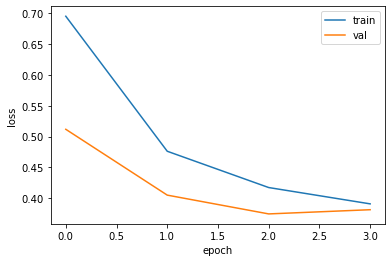

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [61]:
loss, accuracy = model.evaluate(test_input, test_target)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")

10000/10000 [==============================] - 1s 113us/sample - loss: 0.3956 - accuracy: 0.8579
Test loss: 0.396
Test accuracy: 0.858


## 문제 3.4. 제공해 드린 model2.h5을 활용해 보겠습니다 model2.h5를 불러와주세요. 객체저장은 model2로 해주세요

In [62]:
##문제3.4.번 답안 - 한 줄로 작성해주시면 됩니다!
model2 = keras.models.load_model('model2.h5', compile=False)

In [63]:
model2.summary()

Model: "myFasionMnistModel_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
hidden2 (Dense)              (None, 512)               524800    
_________________________________________________________________
hidden3 (Dense)              (None, 256)               131328    
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


## 문제 3.5. 저희가 만든 각각의 은닉층에서의 params가 어떻게 도출되었는지 설명해주세요
#### - 각각 은닉층에서 param 개수가 어떻게 나오는지 설명해주세요 
#### 예. (hidden3) 256 x 512 + 256 = 131328

문제 3.7. 답안 <br>

hidden1 : 1024 * 28 * 28 + 1024 = 803840 <br> 

hidden2 : 1024 * 512 + 512 = 524800 <br>

hidden3 : 512 * 256 + 256 = 131328 <br>

수고하셨습니다~!